In [151]:
import torch
from torch.utils.data import TensorDataset, DataLoader

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [200]:
iris = load_iris()

X, y = iris.data, iris.target

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [208]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


In [226]:
class NeuralNet(torch.nn.Module):
    def __init__(self,
                 input_size : int = 4, 
                 hidden_size : int = 16, 
                 output_size: int=3 ):
        super().__init__()
        self.layer1 = torch.nn.Linear(input_size, hidden_size)
        self.layer2 = torch.nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.layer1(x)
        x = torch.nn.ReLU()(x)
        x = self.layer2(x)
        x = torch.nn.Softmax(dim=1)(x)
        return x

In [213]:
X_train.shape

(112, 4)

In [214]:
batch_size = 2
eta = 1e-3
epochs = 20

In [265]:
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [266]:
model = NeuralNet()

In [267]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = eta)

In [261]:
for epoch in range(epochs):
    model.train()
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

In [262]:
pred = torch.argmax(model(X_test_tensor), dim=1)

In [263]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



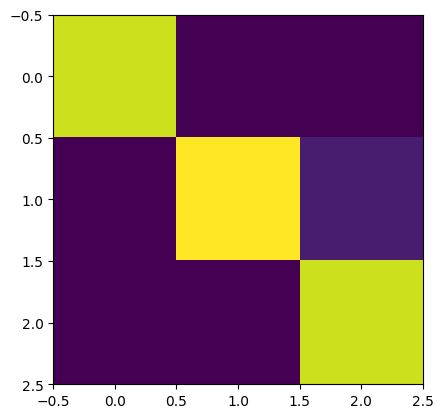

In [264]:
plt.imshow(confusion_matrix(y_test, pred))